In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import numpy as np
import cv2
import random
from tqdm import tqdm
import pickle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from skimage.transform import resize
from tensorflow.keras.models import load_model

IMG_SIZE=100

BASE_DIR=os.getcwd()
dataset_dir=os.path.join(BASE_DIR,"Dataset")
categories=os.listdir(dataset_dir)
print(dataset_dir,"\n",categories)

X = []
y = []

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

x_train = x_train / 255
x_test = x_test / 255

model = load_model('saved_models/model.h5')
model.summary()

model.evaluate(x_test, y_test_one_hot)[1]

C:\Users\Ganesh\Desktop\Final\Dataset 
 ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Ma

0.9806485

Predicted Class: Watermelon 
Probability: 100.0


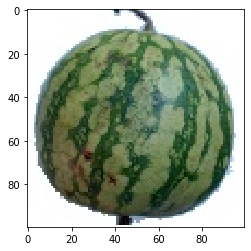

In [7]:
image_add='C:/Users/Ganesh/Desktop/Final/Test/w.jpg'
my_image = plt.imread(image_add)
plt.imshow(my_image)
my_image_resized = resize(my_image, (IMG_SIZE,IMG_SIZE,1))
probabilities = model.predict(np.array( [my_image_resized,] ))

index = np.argsort(probabilities[0,:])
print("Predicted Class:", categories[index[len(categories)-1]],"\nProbability:", probabilities[0,index[len(categories)-1]]*100)